# EXPLORATION 12. 나랑 닮은 연예인은 누구?

---

## Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import cv2
import face_recognition

%matplotlib inline

## Image data

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'

## Crop

In [3]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

## Face embedding

In [4]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0: 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)

## Distance

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [8]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [9]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces, sort_key_func

## Result

#### 전체 연예인

In [10]:
for item in embedding_dict.items():
    print(item[0])

이효리
유재석
박신혜
현빈
박민영
이연희
김영철
공유
김민교
김연아
송지효
옥택연
유승호
김하늘
수지
박보검
장동건
아이비
이수근
김유정
bush
박소담
박서준
제니
하정우
공효진
전미선
박정민
성동일
이병헌
obama
biden
최우식
키아누 리브스
clinton
한가인
아이린
신세경
안소희
박진영
설현
아이유
김생민
my_image
박해일
붐
trump
류준열
이제훈
안재홍


#### 임베딩 거리 측정

In [11]:
sorted_faces, key = get_nearest_face('my_image')

순위 1  이름 : 최우식  거리 : 0.4248428068805864
순위 2  이름 : 공효진  거리 : 0.4457821256715992
순위 3  이름 : 옥택연  거리 : 0.4469092937074349
순위 4  이름 : 이제훈  거리 : 0.46594111354368006
순위 5  이름 : 안재홍  거리 : 0.47895214896670063


#### My image

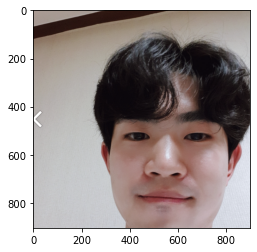

In [12]:
my_image = image_path + 'my_image.jpg'
plt.imshow(face_recognition.load_image_file(my_image))

#### 닮은 연예인 Top 5

In [13]:
import matplotlib.font_manager as fm

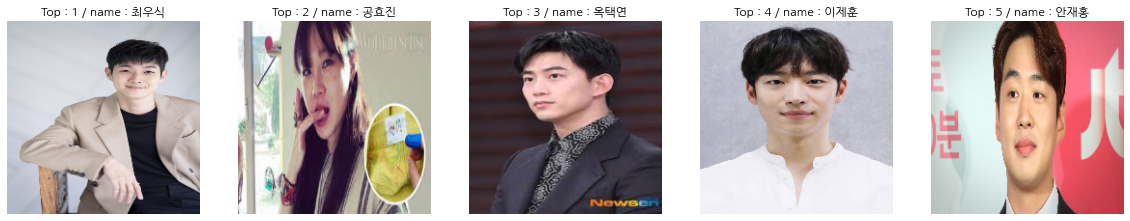

In [14]:
rc('font', family="NanumGothic")
plt.figure(figsize=(20,20))
for idx, image_ in enumerate(sorted_faces[1:6]):
    plt.subplot(1,5,idx+1)
    image = image_path + image_[0] + '.jpeg'
    result = face_recognition.load_image_file(image)
    resized = cv2.resize(result, (200, 200))
    plt.imshow(resized)
    title = 'Top : {} / name : {}'.format(idx+1, image_[0])
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

## Report

닮은 순위 top 5 연예인들의 임베딩 거리를 측정하였고, 결과는 다음과 같았습니다.  

<br>

순위|이름|거리
-|-|-
1|최우식|0.4248428068805864
2|공효진|0.4457821256715992
3|옥택연|0.4469092937074349
4|이제훈|0.46594111354368006 
5|안재홍|0.47895214896670063

<br>

결과를 바탕으로 5명의 사진을 출력해보았습니다.  

In [ ]:
|